https://www.kaggle.com/deadskull7/facreco-90-14-10-epochs

* 7 Emotion Categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
* 48x48 pixel grayscale images of faces

# Data Preparation

In [1]:
! nvidia-smi

Thu Apr  7 13:39:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A40          Off  | 00000000:01:00.0 Off |                    0 |
|  0%   53C    P0    85W / 300W |      4MiB / 45634MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A40          Off  | 00000000:25:00.0 Off |                    0 |
|  0%   

In [2]:
#Import Packages
import os
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import re
from sklearn.utils import shuffle
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#import cv2

In [3]:
#GPU Configuration
#tf.debugging.set_log_device_placement(True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [4]:
#Check Package Version
#print(cv2.__version__)
print(tf.__version__)

2.6.0


In [5]:
os.getcwd()

'/Data'

In [6]:
os.chdir("/Data/FER2013/archive/")

In [7]:
t = datetime.datetime.now()
t = t.strftime('%Y%m%d')

In [8]:
#Import Data as CSV-file
x = pd.read_csv('fer2013.csv')
print(x.values.shape)

(35887, 3)


In [9]:
#Get data overview
x.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [10]:
#Get data overview
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [11]:
type(x)

pandas.core.frame.DataFrame

In [12]:
#Change Data Frame to Numpy Array
data = x.values
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(35887, 3)


In [13]:
#Split into Features and Labels
y = data[:, 0]
pixels = data[:, 1]
print(type(pixels))
print(pixels.shape)
print(len(pixels[0]))
print(pixels[10][10])

print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(35887,)
8287
3
<class 'numpy.ndarray'>
(35887,)


In [14]:
#Define Numpy Array for Images
X = np.zeros((pixels.shape[0], 48*48))

In [15]:
#Check Shape of the Array
X.shape

(35887, 2304)

In [16]:
#Check Shape of an Image
X[0].shape

(2304,)

In [17]:
#Re-Order Pixel Values for Every Image
for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [18]:
#Check Type
type(X)

numpy.ndarray

In [19]:
#Check Length of Images
len(X)

35887

In [20]:
#Check Pixel Values per Image
len(X[0])

2304

In [21]:
#Check Distribution of Emotion Classes
unique, counts = np.unique(y, return_counts=True)
dictionare = dict(zip(unique, counts))
print(dictionare)

{0: 4953, 1: 547, 2: 5121, 3: 8989, 4: 6077, 5: 4002, 6: 6198}


In [22]:
#Check Features
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [23]:
#Check Labels
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [24]:
#Assign Features to a New Variable
x = X

In [25]:
#Check Shape of that Variable
x.shape

(35887, 2304)

In [26]:
#Angry-0, Disgust-1, Fear-2, Happy-3, Sad-4, Surprise-5, Neutral-6
emotional_classes = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

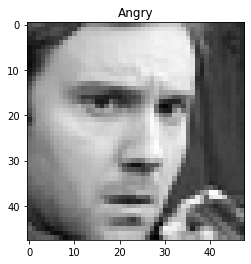

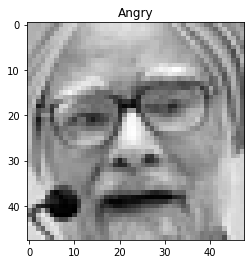

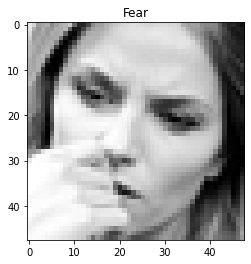

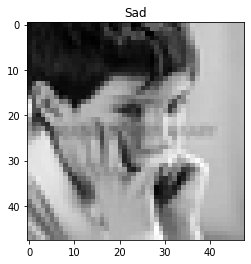

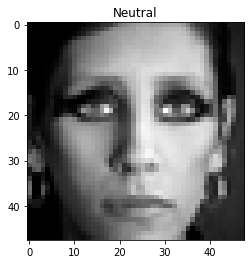

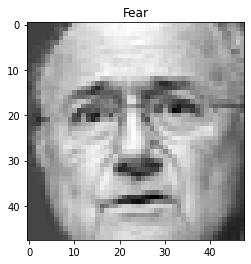

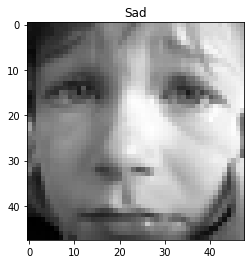

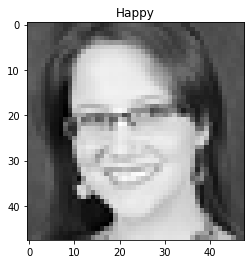

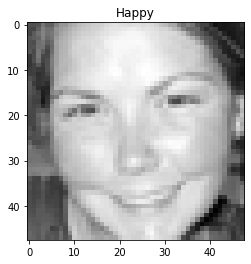

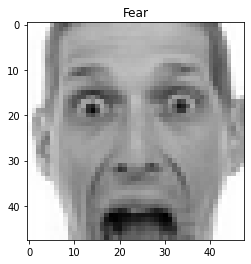

In [27]:
#Cross-Check Labels and Pictures
for ix in range(10):
    plt.figure(ix)
    plt.title(emotional_classes[y[ix]])
    plt.imshow(x[ix].reshape(48, 48), interpolation='none', cmap='gray')
    plt.show()

# Data Pre-Processing

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Identify Training Label Distribution
#Angry-0, Disgust-1, Fear-2, Happy-3, Sad-4, Surprise-5, Neutral-6
unique, counts = np.unique(y, return_counts = True)
dict(zip(unique, counts))

{0: 4953, 1: 547, 2: 5121, 3: 8989, 4: 6077, 5: 4002, 6: 6198}

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [31]:
#Convert Training Data into Numpy Array
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [32]:
print(X_train.shape, Y_train.shape)

(28709, 2304) (28709,)


In [33]:
#Convert Valid Data into Numpy Array
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [34]:
print (X_test.shape, Y_test.shape)

(7178, 2304) (7178,)


In [35]:
#Check Array Shape
print(Y_test.shape)
print(Y_test.shape)

(7178,)
(7178,)


### Split Training Data into Training and Validation Sets

In [36]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, stratify=Y_train)

In [37]:
print(X_train.shape, Y_train.shape)

(20096, 2304) (20096,)


In [38]:
#Convert Valid Data into Numpy Array
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [39]:
print(X_val.shape, Y_val.shape)

(8613, 2304) (8613,)


In [40]:
#Check Array Shape
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(20096,)
(8613,)
(7178,)


In [41]:
#Identify Training Label Distribution
unique, counts = np.unique(Y_train, return_counts = True)
dict(zip(unique, counts))

{0: 2773, 1: 307, 2: 2868, 3: 5034, 4: 3403, 5: 2241, 6: 3470}

In [42]:
#Identify Training Label Distribution
unique, counts = np.unique(Y_val, return_counts = True)
dict(zip(unique, counts))

{0: 1189, 1: 131, 2: 1229, 3: 2157, 4: 1458, 5: 961, 6: 1488}

In [43]:
#Identify Training Label Distribution
unique, counts = np.unique(Y_test, return_counts = True)
dict(zip(unique, counts))

{0: 991, 1: 109, 2: 1024, 3: 1798, 4: 1216, 5: 800, 6: 1240}

In [44]:
#Re-shape Image Data
X_train = X_train.reshape((X_train.shape[0], 48, 48, 1))
X_val = X_val.reshape((X_val.shape[0], 48, 48, 1))
X_test = X_test.reshape((X_test.shape[0], 48, 48, 1))

In [45]:
#Check Re-Shaped Image Data
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(20096, 48, 48, 1)
(8613, 48, 48, 1)
(7178, 48, 48, 1)


In [46]:
#Transform/Categorize Label Elements
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

Y_train = np_utils.to_categorical(Y_train, 7)
Y_val = np_utils.to_categorical(Y_val, 7)
Y_test = np_utils.to_categorical(Y_test, 7)

print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(20096,)
(8613,)
(7178,)
(20096, 7)
(8613, 7)
(7178, 7)


In [47]:
#Check Amount and Shape of Training Data
print(X_train.shape, Y_train.shape)

(20096, 48, 48, 1) (20096, 7)


In [48]:
#Check Amount and Shape of Test Data
print(X_val.shape, Y_val.shape)

(8613, 48, 48, 1) (8613, 7)


In [49]:
print(X_test.shape, Y_test.shape)

(7178, 48, 48, 1) (7178, 7)


Sad


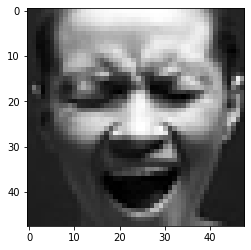

In [50]:
#Cross-Check Input and Output Variable
print(emotional_classes[int(np.where(Y_train[1]==1)[0])])
plt.imshow(X_train[1].reshape(48, 48), interpolation='none', cmap='gray')
plt.show()

Disgust


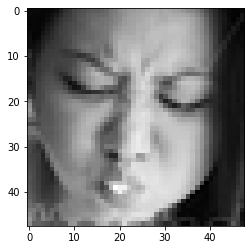

In [51]:
#Cross-Check Input and Output Variable
print(emotional_classes[int(np.where(Y_train[3]==1)[0])])
plt.imshow(X_train[3].reshape(48, 48), interpolation='none', cmap='gray')
plt.show()

In [52]:
#Check Training Data
print(X_train[0].min())
print(X_train[0].mean())
print(X_train[0].max())

0.0
151.22309027777777
255.0


In [53]:
#Normalization of Training Data
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [54]:
#Check Training Data
print(X_train[0].min())
print(X_train[0].mean())
print(X_train[0].max())

0.0
0.5930317265795206
1.0


In [55]:
#Check Validation Data
print(X_val[0].min())
print(X_val[0].mean())
print(X_val[0].max())

0.00784313725490196
0.5400582107843137
0.8901960784313725


In [56]:
#Check Test Data
print(X_test[0].min())
print(X_test[0].mean())
print(X_test[0].max())

0.03137254901960784
0.34413636982570806
0.7372549019607844


In [57]:
#Check Training and Test Data
print(X_train.shape)
print(Y_train.shape)

print(X_val.shape)
print(Y_val.shape)

print(X_test.shape)
print(Y_test.shape)

(20096, 48, 48, 1)
(20096, 7)
(8613, 48, 48, 1)
(8613, 7)
(7178, 48, 48, 1)
(7178, 7)


# ML Model Building

In [58]:
#Import Package(s)
from tensorflow import keras

In [59]:
#Import Package(s)
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.preprocessing.image import ImageDataGenerator

In [60]:
#Import Package(s)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

In [61]:
from keras import backend as K
#old: K.set_image_dim_ordering('th')
K.set_image_data_format('channels_last')#by default 'channels_last'

In [62]:
#Build ImageDataGenerator
datagen_train = ImageDataGenerator(
        featurewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_center=False,  
        samplewise_std_normalization=False,  
        #rescale=1/255, #or 1./255 -1 for 8-bit images, rescale by 1/255 to have pixel values in the range 0 and 1
        #zca_whitening=False,  
        #rotation_range=10, #Random Rotation between 0 and 360 degrees, empty areas filled by different techniques, e. g. "nearest" -> nearest pixel values 
        #zoom_range = 20.0, #Randomly Zooms In or Out 
        #width_shift_range=0.1, #Random Horizontal Shifts, float number -> percentage of pixels, integer number -> number of pixels  
        #height_shift_range=0.1, #Random Vertical Shifts, float number -> percentage of pixels, integer number -> number of pixels
        horizontal_flip=False, #Useful only for symmetrical objects
        vertical_flip=False)  #Useful only for symmetrical objects

datagen_valid = ImageDataGenerator()

In [63]:
#Fit ImageDataGenerator
datagen_train.fit(X_train)

In [64]:
#Define Epochs, Batch Size and Steps per Epoch
epochs = 50
batch_size = 128
steps_per_epoch = len(X_train)//batch_size

In [65]:
#Check Epochs, Batch Size and Steps per Epoch
print(epochs)
print(batch_size) 
print(steps_per_epoch)

50
128
157


In [66]:
#Load Training and Validation Generators
train_generator = datagen_train.flow(X_train, Y_train, batch_size=batch_size)
valid_generator = datagen_valid.flow(X_val, Y_val, batch_size=batch_size)

In [67]:
#Check Training Shape
input_shape = X_train.shape[1:4]
print(input_shape)

(48, 48, 1)


In [68]:
#Check Training Data
print(X_train[0].min())
print(X_train[0].mean())
print(X_train[0].max())

0.0
0.5930317265795206
1.0


In [69]:
#ML Model Building
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7 , activation='softmax'))

2022-04-07 13:40:01.391795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43439 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-04-07 13:40:01.393360: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 43439 MB memory:  -> device: 1, name: NVIDIA A40, pci bus id: 0000:25:00.0, compute capability: 8.6


In [70]:
#Check Model Structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       7

In [71]:
#Define Callbacks
my_callbacks = [
    #tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath='Model/mdl_fer_vam.hdf5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1),
    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6),
    #tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ReduceLROnPlateau(monitor='val_accuracy',
                      patience=3,
                      factor=0.1,   
                      min_lr=0.000000001,
                      min_delta=0.0001,
                      verbose=1)
]

In [72]:
#Define Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
#opt = tf.keras.optimizers.SGD(learning_rate=0.0001)

In [73]:
#Compile Model
model.compile(loss="categorical_crossentropy", 
              optimizer= opt,
              metrics=["accuracy"]
             )

# Model Training

In [74]:
#Train Model
history = model.fit(train_generator, #X_train, Y_train, 
          epochs=epochs, 
          validation_data=valid_generator, #(X_val, Y_val), 
          callbacks = [my_callbacks],
          verbose=1)

2022-04-07 13:40:01.900065: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-04-07 13:40:03.217399: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204
2022-04-07 13:40:04.814817: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


157/157 [==============================] - 6s 17ms/step - loss: 1.8668 - accuracy: 0.2254 - val_loss: 1.8261 - val_accuracy: 0.2504

Epoch 00001: val_accuracy improved from -inf to 0.25044, saving model to Model/mdl_fer_vam.hdf5
Epoch 2/50
157/157 [==============================] - 2s 14ms/step - loss: 1.8433 - accuracy: 0.2331 - val_loss: 1.8057 - val_accuracy: 0.2503

Epoch 00002: val_accuracy did not improve from 0.25044
Epoch 3/50
157/157 [==============================] - 2s 13ms/step - loss: 1.7957 - accuracy: 0.2590 - val_loss: 1.7352 - val_accuracy: 0.3084

Epoch 00003: val_accuracy improved from 0.25044 to 0.30837, saving model to Model/mdl_fer_vam.hdf5
Epoch 4/50
157/157 [==============================] - 2s 13ms/step - loss: 1.7059 - accuracy: 0.3126 - val_loss: 1.6265 - val_accuracy: 0.3903

Epoch 00004: val_accuracy improved from 0.30837 to 0.39034, saving model to Model/mdl_fer_vam.hdf5
Epoch 5/50
157/157 [==============================] - 2s 13ms/step - loss: 1.6207 - ac

In [75]:
#Identify Keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

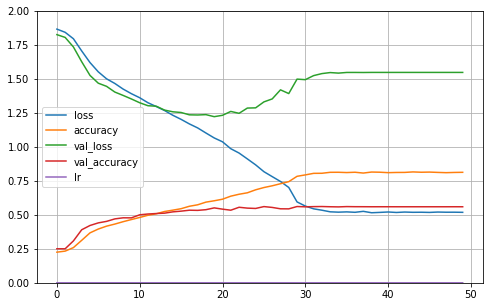

In [76]:
#Visualize Keys
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

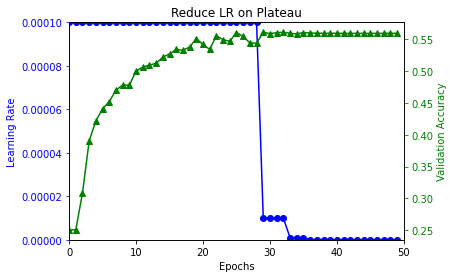

In [77]:
#Visualize LR on Plateau
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, epochs)
plt.gca().set_ylim(0, 0.0001)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_accuracy"], "g^-")
ax2.set_ylabel('Validation Accuracy', color='g')
ax2.tick_params('y', colors='g')

plt.title("Reduce LR on Plateau", fontsize=12)
plt.show()

# Model Evaluation

## Evaluation with Last Trained Model

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
print(X_test.shape, Y_test.shape)

(7178, 48, 48, 1) (7178, 7)


In [80]:
#Predict Labels for Test Set
preds = model.predict(X_test)

In [81]:
#Check Predictions
preds

array([[2.52363920e-01, 3.03222928e-02, 1.84795946e-01, ...,
        4.72996026e-01, 1.18755852e-03, 5.68348132e-02],
       [1.44032715e-02, 2.97170445e-05, 6.10437617e-03, ...,
        3.47658470e-02, 1.36431423e-04, 9.43908870e-01],
       [7.70902453e-09, 2.13281693e-12, 2.07507043e-08, ...,
        6.64467237e-08, 3.35168941e-08, 1.17419922e-05],
       ...,
       [3.82368743e-01, 8.46644572e-04, 1.04843946e-02, ...,
        2.11133808e-02, 1.84410624e-03, 2.11614832e-01],
       [7.40143102e-09, 1.52444431e-12, 4.04617921e-08, ...,
        2.67649423e-08, 1.36960907e-07, 3.55075827e-07],
       [3.00407497e-04, 8.61477588e-07, 1.91153769e-04, ...,
        3.98452430e-05, 9.81550693e-05, 4.11454850e-04]], dtype=float32)

In [82]:
#Check Predictions
len(preds)

7178

In [83]:
#Check True Labels
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [84]:
#Check Predictions' Shape
preds.shape

(7178, 7)

In [85]:
#Function to Get Single Prediction Class
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))
  
  for i in range(len(preds)):
    pred_class[i] = np.argmax(preds[i])
  
  return pred_class

In [86]:
#Get Single Prediction Class
predicted_class = get_class(preds)

In [87]:
#Check Single Prediction Classes
predicted_class[0:10]

array([[4.],
       [6.],
       [3.],
       [3.],
       [0.],
       [3.],
       [4.],
       [6.],
       [3.],
       [3.]])

In [88]:
#Check Shape of Single Prediction Classes
predicted_class.shape

(7178, 1)

In [89]:
#Check Shape of True Classes
Y_test.shape

(7178, 7)

In [90]:
#Get Single True Class
Y_test = Y_test.argmax(axis=1)

In [91]:
#Check Single True Class
Y_test

array([4, 6, 3, ..., 3, 3, 3])

In [92]:
#Create Confusion Matrix
cm = confusion_matrix(Y_test, predicted_class)

In [93]:
#Show Confusion Matrix
cm

array([[ 493,    0,   86,   95,  175,   21,  121],
       [  33,    0,   29,    4,   36,    4,    3],
       [ 147,    0,  341,   66,  228,  119,  123],
       [  60,    0,   50, 1406,   86,   39,  157],
       [ 169,    0,  123,   92,  593,   22,  217],
       [  24,    0,  105,   45,   26,  557,   43],
       [ 120,    0,   75,  124,  247,   24,  650]])

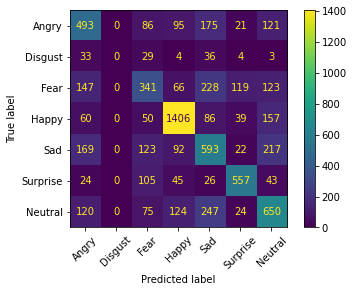

In [94]:
#Show Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(Y_test, predicted_class, display_labels=emotional_classes, xticks_rotation=45)
plt.show()

In [95]:
#Show Valuation Metrics
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, predicted_class)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, predicted_class, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, predicted_class, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, predicted_class, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, predicted_class, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, predicted_class, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, predicted_class, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, predicted_class, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, predicted_class, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, predicted_class, average='weighted')))


Accuracy: 0.56

Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.47
Macro Recall: 0.47
Macro F1-score: 0.47

Weighted Precision: 0.55
Weighted Recall: 0.56
Weighted F1-score: 0.56


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
#Check Emotional Classes
emotional_classes

['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [97]:
#Show Classification Report
print('\nClassification Report\n')
print(classification_report(Y_test, predicted_class, target_names=emotional_classes))


Classification Report

              precision    recall  f1-score   support

       Angry       0.47      0.50      0.48       991
     Disgust       0.00      0.00      0.00       109
        Fear       0.42      0.33      0.37      1024
       Happy       0.77      0.78      0.77      1798
         Sad       0.43      0.49      0.45      1216
    Surprise       0.71      0.70      0.70       800
     Neutral       0.49      0.52      0.51      1240

    accuracy                           0.56      7178
   macro avg       0.47      0.47      0.47      7178
weighted avg       0.55      0.56      0.56      7178



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
clf_report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = predicted_class, target_names=emotional_classes, output_dict=True)).transpose()
clf_report

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score      support
Angry          0.471319  0.497477  0.484045   991.000000
Disgust        0.000000  0.000000  0.000000   109.000000
Fear           0.421508  0.333008  0.372068  1024.000000
Happy          0.767467  0.781980  0.774656  1798.000000
Sad            0.426312  0.487664  0.454929  1216.000000
Surprise       0.708651  0.696250  0.702396   800.000000
Neutral        0.494673  0.524194  0.509005  1240.000000
accuracy       0.562831  0.562831  0.562831     0.562831
macro avg      0.469990  0.474368  0.471014  7178.000000
weighted avg   0.554098  0.562831  0.557230  7178.000000

In [99]:
clf_report.to_csv('../Classification_Report/{}_Classfication_Report_FER2013_lastTrainedModel_run.csv'.format(t), sep=',', index= True)

In [100]:
print('{}_Classfication_Report_FER2013_lastTrainedModel_run.csv'.format(t))

20220407_Classfication_Report_FER2013_lastTrainedModel_run.csv


## Evaluation with Model Having Highest Val_Acc

In [101]:
print(X_test.shape, Y_test.shape)

(7178, 48, 48, 1) (7178,)


In [102]:
#Load Model with Lowest Val_Loss
model = keras.models.load_model('Model/mdl_fer_vam.hdf5') #model including optimizer state
#model = model.load_weights(checkpoint_filepath) #model, but state of the optimizer is discarded

In [103]:
#Predict Labels for Test Set
preds = model.predict(X_test)

In [104]:
#Check Predictions
preds

array([[2.3305574e-01, 3.1930223e-02, 1.9547383e-01, ..., 4.7505260e-01,
        1.6183179e-03, 6.0891099e-02],
       [2.3561900e-02, 6.5035580e-05, 1.0069993e-02, ..., 4.7277216e-02,
        2.2724817e-04, 9.1821122e-01],
       [1.3329337e-08, 3.7152451e-12, 3.2812142e-08, ..., 8.5227121e-08,
        6.2835234e-08, 1.0953696e-05],
       ...,
       [5.0420171e-01, 1.8808426e-03, 1.6798511e-02, ..., 3.4269918e-02,
        2.2859746e-03, 3.0296937e-01],
       [1.0585893e-08, 2.4084866e-12, 4.6625708e-08, ..., 3.8753949e-08,
        1.4717571e-07, 5.3316245e-07],
       [4.2311210e-04, 2.0323980e-06, 3.6406479e-04, ..., 7.6211662e-05,
        2.1777661e-04, 6.2019291e-04]], dtype=float32)

In [105]:
#Check Predictions
len(preds)

7178

In [106]:
#Check True Labels
Y_test

array([4, 6, 3, ..., 3, 3, 3])

In [107]:
#Check Predictions' Shape
preds.shape

(7178, 7)

In [108]:
#Function to Get Single Prediction Class
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))
  
  for i in range(len(preds)):
    pred_class[i] = np.argmax(preds[i])
  
  return pred_class

In [109]:
#Get Single Prediction Class
predicted_class = get_class(preds)

In [110]:
#Check Single Prediction Classes
predicted_class[0:10]

array([[4.],
       [6.],
       [3.],
       [3.],
       [0.],
       [3.],
       [4.],
       [6.],
       [3.],
       [3.]])

In [111]:
#Check Shape of Single Prediction Classes
predicted_class.shape

(7178, 1)

In [112]:
#Check Shape of True Classes
Y_test.shape

(7178,)

In [113]:
#Check Single True Class
Y_test

array([4, 6, 3, ..., 3, 3, 3])

In [114]:
#Create Confusion Matrix
cm = confusion_matrix(Y_test, predicted_class)

In [115]:
#Show Confusion Matrix
cm

array([[ 477,    0,   91,  104,  172,   22,  125],
       [  38,    0,   25,    5,   33,    5,    3],
       [ 143,    0,  332,   74,  203,  141,  131],
       [  49,    0,   46, 1423,   86,   43,  151],
       [ 164,    0,  131,  102,  560,   25,  234],
       [  20,    0,   93,   46,   25,  576,   40],
       [ 110,    0,   72,  124,  234,   31,  669]])

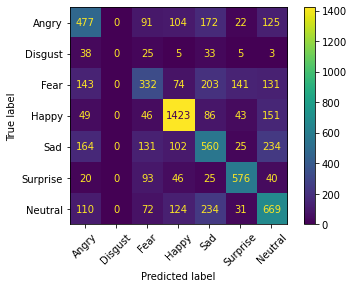

In [116]:
#Show Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(Y_test, predicted_class, display_labels=emotional_classes, xticks_rotation=45)
plt.show()

In [117]:
#Show Valuation Metrics
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, predicted_class)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, predicted_class, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, predicted_class, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, predicted_class, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, predicted_class, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, predicted_class, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, predicted_class, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, predicted_class, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, predicted_class, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, predicted_class, average='weighted')))


Accuracy: 0.56

Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.47
Macro Recall: 0.47
Macro F1-score: 0.47

Weighted Precision: 0.55
Weighted Recall: 0.56
Weighted F1-score: 0.55


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
#Check Emotional Classes
emotional_classes

['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [119]:
#Show Classification Report
print('\nClassification Report\n')
print(classification_report(Y_test, predicted_class, target_names=emotional_classes))


Classification Report

              precision    recall  f1-score   support

       Angry       0.48      0.48      0.48       991
     Disgust       0.00      0.00      0.00       109
        Fear       0.42      0.32      0.37      1024
       Happy       0.76      0.79      0.77      1798
         Sad       0.43      0.46      0.44      1216
    Surprise       0.68      0.72      0.70       800
     Neutral       0.49      0.54      0.52      1240

    accuracy                           0.56      7178
   macro avg       0.47      0.47      0.47      7178
weighted avg       0.55      0.56      0.55      7178



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
clf_report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = predicted_class, target_names=emotional_classes, output_dict=True)).transpose()
clf_report

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score      support
Angry          0.476523  0.481332  0.478916   991.000000
Disgust        0.000000  0.000000  0.000000   109.000000
Fear           0.420253  0.324219  0.366042  1024.000000
Happy          0.757721  0.791435  0.774211  1798.000000
Sad            0.426504  0.460526  0.442863  1216.000000
Surprise       0.683274  0.720000  0.701156   800.000000
Neutral        0.494457  0.539516  0.516005  1240.000000
accuracy       0.562413  0.562413  0.562413     0.562413
macro avg      0.465533  0.473861  0.468456  7178.000000
weighted avg   0.549363  0.562413  0.554577  7178.000000

In [121]:
clf_report.to_csv('../Classification_Report/{}_Classfication_Report_FER2013_bestTrainedModel_run.csv'.format(t), sep=',', index= True)

In [122]:
print('{}_Classfication_Report_FER2013_bestTrainedModel_run.csv'.format(t))

20220407_Classfication_Report_FER2013_bestTrainedModel_run.csv
